In [154]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")


In [156]:
boston = tf.keras.datasets.boston_housing


In [158]:
dir(boston)


['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [160]:
df=pd.read_csv("boston.csv")

In [162]:
# Separate the dependent variable and indepedent variables
X= df.drop(columns= ['MEDV','RAD'])
Y = df['MEDV']


In [164]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state= 42)


In [166]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape


((404, 11), (404,), (102, 11), (102,))

In [168]:
scaler = StandardScaler()

In [170]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [172]:
Y_train_scaled = scaler.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler.transform(Y_test.values.reshape(-1, 1))


In [174]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(11,), name='input-layer'),
    tf.keras.layers.Dense(100, name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50, name='hidden-layer-4'),
    tf.keras.layers.Dense(1, name='output-layer')
])

tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [176]:
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden-layer-2 (Dense)               │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-3 (BatchNormalization)  │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-4 (Dense)               │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output-layer (Dense)                 │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,701 (26.18 KB)

 Trainable params: 6,501 (25.39 KB)

 Non-trainable params: 200 (800.00 B)

In [178]:
model.compile(
 optimizer='adam',
 loss='mse',
 metrics=['mae']
)

In [180]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=20,
validation_data=(X_test, Y_test))


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 581.2157 - mae: 22.6131 - val_loss: 4034.4551 - val_mae: 61.7479
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 623.6031 - mae: 23.3056 - val_loss: 1709.8589 - val_mae: 40.4947
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 563.9672 - mae: 22.2952 - val_loss: 1297.1420 - val_mae: 35.2796
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 588.5395 - mae: 22.8229 - val_loss: 1121.7743 - val_mae: 32.7883
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 479.8955 - mae: 20.8481 - val_loss: 809.3954 - val_mae: 27.8736
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 406.2704 - mae: 19.2059 - val_loss: 402.6728 - val_mae: 19.3249
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 335.1460 - mae: 17.2850 - val_loss: 311.7424 - val_mae: 16.6416
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 237.4014 - mae: 14.0730 - val_loss: 82.1153 - val_mae: 7.4896
Epoch 9/20
13/

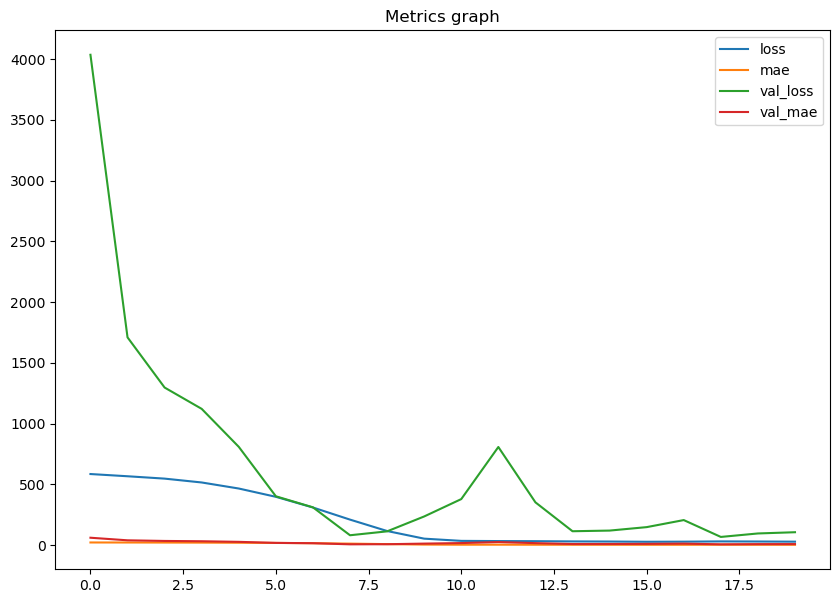

In [181]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [184]:
y_pred = model.predict(X_test)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000291FC606480> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


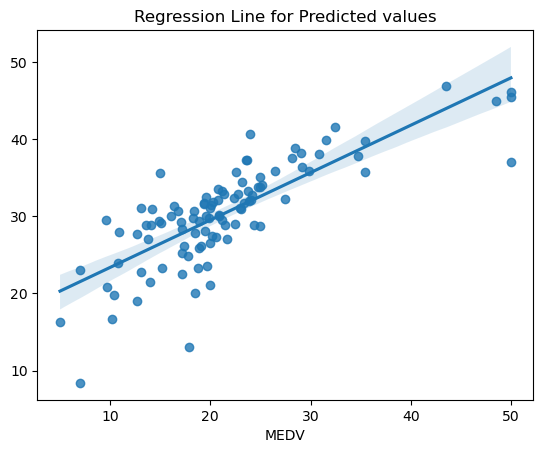

In [186]:
sns.regplot(x=Y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [188]:
def regression_metrics_display(Y_test, y_pred):
 print(f"MAE is {metrics.mean_absolute_error(Y_test, y_pred)}")
 print(f"MSE is {metrics.mean_squared_error(Y_test,y_pred)}")
 print(f"R2 score is {metrics.r2_score(Y_test, y_pred)}")
regression_metrics_display(Y_test, y_pred)


MAE is 9.515974521636961
MSE is 107.04340969995017
R2 score is -0.4596739058986081
